ЛАБОРАТОРНАЯ РАБОТА 3.

**МЕТОД БЛИЖАЙШИХ СОСЕДЕЙ**

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report
import pandas
from scipy import stats

#Scikit-Learn

Scikit-Learn — это Python-библиотека, разработанная David Cournapeau в 2007 году и содкржит большое количество алгоритмов для задач, связанных с классификацией и машинным обучением в целом.

Scikit-Learn базируется на библиотеке SciPy, которую нужно установить перед началом работы

Установка:

In [100]:
# !pip install scikit-learn # в колаборатории этого можно не делать, в своей локальной среде необходимо обеспечить установку пакета и всех его зависимостей


# Метод ближайших соседей

Метод ближайших соседей (k Nearest Neighbors, или kNN) — тоже очень популярный метод классификации, также иногда используемый в задачах регрессии. Это, наравне с деревом решений, один из самых понятных подходов к классификации. На уровне интуиции суть метода такова: посмотри на соседей, какие преобладают, таков и ты. Формально основой метода является гипотезой компактности: если метрика расстояния между примерами введена достаточно удачно, то схожие примеры гораздо чаще лежат в одном классе, чем в разных. 

Для классификации каждого из объектов тестовой выборки необходимо последовательно выполнить следующие операции:
 - Вычислить расстояние до каждого из объектов обучающей выборки
 - Отобрать $k$ объектов обучающей выборки, расстояние до которых минимально
 - Класс классифицируемого объекта — это класс, наиболее часто встречающийся среди $k$ ближайших соседей
 
 Примечательное свойство такого подхода  – его ленивость. Это значит, что вычисления начинаются только в момент классификации тестового примера, а заранее, только при  наличии обучающих примеров, никакая модель не строится. 
 
 Методы на основе соседей известны как не обобщающие методы машинного обучения, поскольку они просто «запоминают» все свои обучающие данные 


### Метод ближайших соседей в реальных задачах


Качество классификации методом ближайших соседей зависит от нескольких параметров:
 - число соседей
 - метрика расстояния между объектами (часто используются метрика Хэмминга, евклидово расстояние, косинусное расстояние и расстояние Минковского). Отметим, что при использовании большинства метрик значения признаков надо масштабировать. Условно говоря, чтобы признак "Зарплата" с диапазоном значений до 100 тысяч не вносил больший вклад в расстояние, чем "Возраст" со значениями до 100. 
 - веса соседей (соседи тестового примера могут входить с разными весами, например, чем дальше пример, тем с меньшим коэффициентом учитывается его "голос")

Известная реализация метода ближайших соседей во фреймвоке SkiKit-Learn (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

**class** sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None) , 

где при инициализации определяем следующие параметры:

  - n_neighbors=5,
  - weights='uniform',однородные веса. Все точки в каждой окрестности имеют одинаковый вес.Кроме того, возможен вариант 'distance' : взвешивание точек обратно их расстоянию. в этом случае более близкие соседи точки запроса будут иметь большее влияние, чем соседи, которые находятся дальше. Третий вариант : **собственная функция** определяемая пользователем, которая принимает массив расстояний и возвращает массив той же формы, содержащий веса 
  - algorithm : "brute", "ball_tree", "KD_tree", или "auto". В первом случае ближайшие соседи для каждого тестового примера считаются перебором обучающей выборки. Во втором и третьем - расстояние между примерами хранятся в дереве, что ускоряет нахождение ближайших соседей. В случае указания параметра "auto" подходящий способ нахождения соседей будет выбран автоматически на основе обучающей выборки.
  - leaf_size (опционально): порог переключения на полный перебор в случае выбора BallTree или KDTree для нахождения соседей
  - metric: "minkowski", "manhattan", "euclidean", "chebyshev" и другие


При работе в любой классификационной задаче необходимо выполнить следующие действия:

  1. прочитать (или создать) данные
  2. проверить их полноту и чистоту
  3. оценить размер данных и соотношение классов во множестве примеров (сбалансированные классы или нет)
  4. разделить выборку на тренировочную ( очень часто еще и на тренировочную и валидационную) и отложенную
  5. обработать примеры из тренировочной выборки, реализовать схему их обработки функционально или в рамках ООП и применить к (если есть, валидационным данным и) отложенной выборке 
  6. создать объект классификатор (или несколько классификаторов для сравнения моделей различной сложности)
  7. обучить объект классификатор (или несколько объектов классификаторов)
  8. выбрать метрику для оценки модели
  9. Оценить эффективность модели (или сравнить эффективность нескольких обученных моделей)
  10 применить модель к данным отложеной выборки и определить значения выбраной метрики
  11. Сделать вывод о качестве модели


**Пример работы в KNN:**

In [101]:
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [102]:
data = load_iris()
X, y = data.data, data.target

In [103]:
X[0, :]

array([5.1, 3.5, 1.4, 0.2])

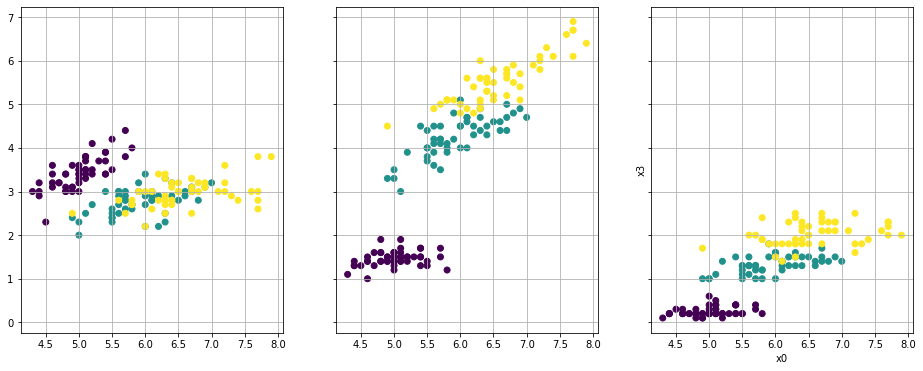

In [104]:
f, axes = plt.subplots(1, 3, sharey=True, figsize=(16, 6))
for i in range(1,4):
    axes[i-1].scatter(X[:, 0], X[:, i], c=y)
    axes[i-1].grid()
    
plt.xlabel('x0')
plt.ylabel('x'+str(i))
plt.show()

Посмотрим на соотношение классов в выборке, видим, что  поровну .

In [105]:
np.bincount(y)

array([50, 50, 50], dtype=int64)

Выделим 70% выборки (X_train, y_train) под обучение и 30% будут отложенной выборкой (X_holdout, y_holdout). отложенная выборка никак не будет участвовать в настройке параметров моделей, на ней мы в конце, после этой настройки, оценим качество полученной модели.

In [106]:
# разбиение данных на тренировочные и отложенную выборку (тестовые), 
#где X, y - описание примеров и их целевое свойство (классы), а test_size=0.3 - пропорция разбиения (доля тестов)
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3, random_state=17)
print(X,y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

Обучим  kNN.

In [107]:
knn = KNeighborsClassifier(n_neighbors=10)

In [108]:
%%time
knn.fit(X_train, y_train)

Wall time: 2 ms


KNeighborsClassifier(n_neighbors=10)

Сделаем прогнозы для отложенной выборки. Видим, что метод ближайших соседей справился неплохо. 

In [109]:

knn_pred = knn.predict(X_holdout)
accuracy_score(y_holdout, knn_pred)

0.9333333333333333

Задание 1

ПРоверить для предществующего примера:

  1.1. число соседей : 1, 3, 5, 7, 100
  
  1.2. метрики для оценки расстояний "minkowski", "manhattan", "euclidean" (для числа соседей , которое обеспечило лучший результат по accuracy)

  1.3. использовать вариант с weights= 'distance' (для числа соседей , которое обеспечило лучший результат по accuracy)

  1.4. Сравнить результаты работы на отложенной выборке

  1.5. построить график для accuracy от числа соседей и составить таблицу результатов для 1.2 и 1.3



Задание 2.

  2.1. Провести формирование классификатора KNN для набора по своему варианту (см. ВАРИАНТЫ) в нескольких модификациях по числу соседей, расстояний и способов взвешивания (построить 5 вариантов)
  
  2.2. Определить вид метрики , который соответствует степени сбалансированности набора данных
  
  2.3. Сравнить варианты классификатора по метрике .

In [110]:
#ВАРИАНТЫ
from sklearn.datasets import load_iris, make_classification

V4 = make_classification(n_samples = 1000, n_features=10, n_redundant=2, n_informative=2,random_state=10, n_clusters_per_class=2)
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3, random_state=17)
acc=[]
print(acc)

[]


In [111]:
 from sklearn.metrics import recall_score
knn_1 = KNeighborsClassifier(n_neighbors=1, metric='manhattan')

knn_1.fit(X_train, y_train)

knn_pred_1 = knn_1.predict(X_holdout)
acc.append(accuracy_score(y_holdout, knn_pred_1)) 

In [112]:
dd = classification_report(y_holdout, knn_pred_1)

In [113]:
dd.split('\n')

['              precision    recall  f1-score   support',
 '',
 '           0       1.00      1.00      1.00        12',
 '           1       0.95      1.00      0.97        19',
 '           2       1.00      0.93      0.96        14',
 '',
 '    accuracy                           0.98        45',
 '   macro avg       0.98      0.98      0.98        45',
 'weighted avg       0.98      0.98      0.98        45',
 '']

In [114]:
knn_3 = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

knn_3.fit(X_train, y_train)

knn_pred_3 = knn_3.predict(X_holdout)
accuracy_score(y_holdout, knn_pred_3)
acc.append(accuracy_score(y_holdout, knn_pred_3))

In [115]:
print(classification_report(y_holdout, knn_pred_3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.95      1.00      0.97        19
           2       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [116]:
X_holdout.shape

(45, 4)

In [117]:
knn_5 = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

knn_5.fit(X_train, y_train)

knn_pred_5 = knn_5.predict(X_holdout)
accuracy_score(y_holdout, knn_pred_5)
acc.append(accuracy_score(y_holdout, knn_pred_5))
print(acc)

[0.9777777777777777, 0.9777777777777777, 0.9555555555555556]


In [118]:
accuracy_score(y_holdout, knn_pred_5)

0.9555555555555556

In [119]:
print(classification_report(y_holdout, knn_pred_5))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.90      1.00      0.95        19
           2       1.00      0.86      0.92        14

    accuracy                           0.96        45
   macro avg       0.97      0.95      0.96        45
weighted avg       0.96      0.96      0.95        45



In [120]:
knn_7 = KNeighborsClassifier(n_neighbors=7, metric='euclidean')

knn_7.fit(X_train, y_train)

knn_pred_7 = knn_7.predict(X_holdout)
accuracy_score(y_holdout, knn_pred_7)
acc.append(accuracy_score(y_holdout, knn_pred_7)) 

In [121]:
print(classification_report(y_holdout, knn_pred_7))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.86      1.00      0.93        19
           2       1.00      0.79      0.88        14

    accuracy                           0.93        45
   macro avg       0.95      0.93      0.94        45
weighted avg       0.94      0.93      0.93        45



In [122]:
knn_100 = KNeighborsClassifier(n_neighbors=100, metric='manhattan')

knn_100.fit(X_train, y_train)

knn_pred_100 = knn_100.predict(X_holdout)
accuracy_score(y_holdout, knn_pred_100)

print(type(accuracy_score(y_holdout, knn_pred_100)))
acc.append(accuracy_score(y_holdout, knn_pred_100))
y = np.array(acc)
z=[1,3,5,7,100]
print(y)

<class 'numpy.float64'>
[0.97777778 0.97777778 0.95555556 0.93333333 0.57777778]


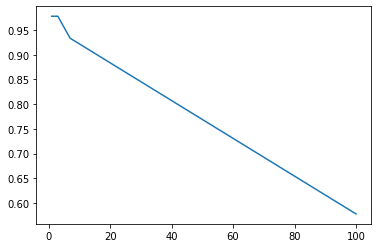

In [123]:
plt.plot(z,y)

In [147]:
print(classification_report(y_holdout, knn_pred_100))

              precision    recall  f1-score   support

           0       0.55      1.00      0.71        12
           1       0.00      0.00      0.00        19
           2       0.61      1.00      0.76        14

    accuracy                           0.58        45
   macro avg       0.38      0.67      0.49        45
weighted avg       0.33      0.58      0.42        45



C:\python\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\python\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\python\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [149]:

print(V4[-1])
temp = V4[-1]
print(np.count_nonzero(temp == 1))
print(len(V4[-1])-np.count_nonzero(temp == 1))

[0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1 0 0
 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0
 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1
 1 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1
 0 0 0 1 1 0 1 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1
 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1
 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 0 1
 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 0
 1 1 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 1
 0 0 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0
 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1
 0 1 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0
 0 1 0 0 1 0 0 0 1 0 1 0 

In [150]:
print(V4)


(array([[-1.00583777, -0.37653943, -0.62017967, ...,  1.67804613,
         1.0801799 ,  0.35358714],
       [ 0.41117999,  0.76240872, -0.78421   , ..., -0.85044853,
        -0.46130068,  1.06223729],
       [-1.52540752,  2.22793382,  0.5477266 , ...,  2.44004248,
         1.69891857, -0.70530243],
       ...,
       [-1.614926  ,  0.74310266,  1.13675653, ...,  2.8471565 ,
        -0.91145218, -1.22062837],
       [-0.14262151, -1.43323743, -2.54920034, ...,  0.39777869,
        -0.71639987,  0.6122551 ],
       [-0.1251796 ,  0.73011191, -1.87888552, ...,  0.74154153,
         0.30886522, -1.36966537]]), array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0

In [151]:
X_train, X_holdout, y_train, y_holdout = train_test_split(V4[0], V4[-1], test_size=0.25)

In [152]:
knn1 = KNeighborsClassifier(n_neighbors=1, metric='manhattan')
knn3 = KNeighborsClassifier(n_neighbors=3, weights='uniform')
knn5 = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn7 = KNeighborsClassifier(n_neighbors=7, weights='uniform', metric='manhattan')
knn100 = KNeighborsClassifier(n_neighbors=100)

knn1.fit(X_train, y_train)
knn3.fit(X_train, y_train)
knn5.fit(X_train, y_train)
knn7.fit(X_train, y_train)
knn100.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=100)

In [153]:
knn_pred1 = knn1.predict(X_holdout)
print(accuracy_score(y_holdout, knn_pred1))

knn_pred3 = knn3.predict(X_holdout)
print(accuracy_score(y_holdout, knn_pred3))

knn_pred5 = knn5.predict(X_holdout)
print(accuracy_score(y_holdout, knn_pred5))

knn_pred7 = knn7.predict(X_holdout)
print(accuracy_score(y_holdout, knn_pred7))

knn_pred100 = knn100.predict(X_holdout)
print(accuracy_score(y_holdout, knn_pred100))

0.788
0.848
0.864
0.884
0.892


In [47]:
print(classification_report(y_holdout, knn_pred1))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       139
           1       0.84      0.79      0.81       111

    accuracy                           0.84       250
   macro avg       0.84      0.84      0.84       250
weighted avg       0.84      0.84      0.84       250



In [48]:
print(classification_report(y_holdout, knn_pred3))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       139
           1       0.83      0.81      0.82       111

    accuracy                           0.84       250
   macro avg       0.84      0.84      0.84       250
weighted avg       0.84      0.84      0.84       250



In [49]:
print(classification_report(y_holdout, knn_pred5))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       139
           1       0.84      0.80      0.82       111

    accuracy                           0.84       250
   macro avg       0.84      0.84      0.84       250
weighted avg       0.84      0.84      0.84       250



In [50]:
print(classification_report(y_holdout, knn_pred7))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88       139
           1       0.86      0.82      0.84       111

    accuracy                           0.86       250
   macro avg       0.86      0.86      0.86       250
weighted avg       0.86      0.86      0.86       250



In [51]:
print(classification_report(y_holdout, knn_pred100))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       139
           1       0.86      0.86      0.86       111

    accuracy                           0.88       250
   macro avg       0.88      0.88      0.88       250
weighted avg       0.88      0.88      0.88       250



Резюме :

- В чистом виде kNN может послужить хорошим стартом (baseline) в решении какой-либо задачи;
- В соревнованиях Kaggle kNN часто используется для построения мета-признаков (прогноз kNN подается на вход прочим моделям) или в стекинге/блендинге;
- Идея ближайшего соседа расширяется и на другие задачи, например, в рекомендательных системах простым начальным решением может быть рекомендация какого-то товара (или услуги), популярного среди *ближайших соседей* человека, которому хотим сделать рекомендацию;
- На практике для больших выборок часто пользуются *приближенными* методами поиска ближайших соседей.

Вопросы для контроля:

  1. Можно ли обуществить формирование классификатора, который не ошибается
  2. Зачем нужно отложенная выборка
  3. как повлияет на результат теста увеличение числа соседей
  4. как повлияет на результат теста изменение способа оценки расстояний в алгоритме ближайщего соседа
  5. перечислите достоинства алгоритма к ближайщий сосед
  6. каковы недостатки метода к ближайщий сосед
  7. как сократить поиск в пространстве примеров соседей